# Aprendizaje automático

## Clasificador K-Means (Clustering - No supervisado)

In [1]:
import pandas as pd
import numpy as np

In [2]:
ruta = 'Mall_Customers-2.csv'
df = pd.read_csv(ruta)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename({'Gender':'Genero',
            'Age':'Edad', ''
            'Annual Income (k$)':'Ingreso Anual', 
            'Spending Score (1-100)':'Gasto'}, axis=1, inplace=True)
            

In [5]:
df.head()

,CustomerID,Genero,Edad,Ingreso Anual,Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Genero         200 non-null    object
 2   Edad           200 non-null    int64 
 3   Ingreso Anual  200 non-null    int64 
 4   Gasto          200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Ingreso Anual,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Gasto,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.Genero.value_counts()

Genero
Female    112
Male       88
Name: count, dtype: int64

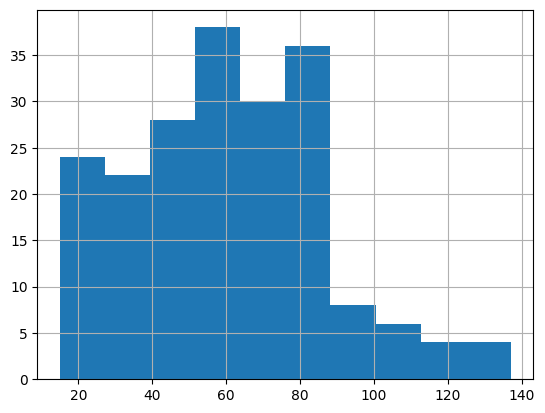

In [9]:
df["Ingreso Anual"].hist();

In [10]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

Text(0.5, 0, 'Ingreso anual (k$)')

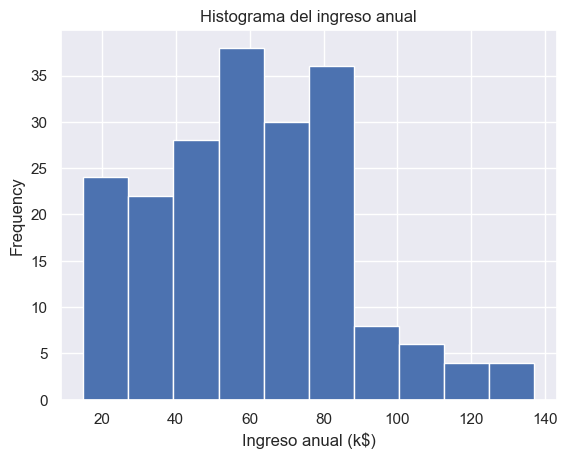

In [11]:
df["Ingreso Anual"].plot.hist();
plt.title("Histograma del ingreso anual")
plt.xlabel("Ingreso anual (k$)")

In [12]:
#Si ingreso < 50  entonces 'Ingreso bajo'
#Si ingreso <= 90 entonces 'Ingreso moderado'
#Si ingreso > 90 entonces 'Ingreso alto'

In [13]:
df['Segmento'] = np.where(df['Ingreso Anual'] < 50, 'Ingreso bajo',
                    np.where(df['Ingreso Anual'] <= 90, 'Ingreso moderado', 'Ingreso alto'))


In [14]:
df

,CustomerID,Genero,Edad,Ingreso Anual,Gasto,Segmento
0,1,Male,19,15,39,Ingreso bajo
1,2,Male,21,15,81,Ingreso bajo
2,3,Female,20,16,6,Ingreso bajo
3,4,Female,23,16,77,Ingreso bajo
4,5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...,...
195,196,Female,35,120,79,Ingreso alto
196,197,Female,45,126,28,Ingreso alto
197,198,Male,32,126,74,Ingreso alto
198,199,Male,32,137,18,Ingreso alto


In [15]:
df.Segmento.value_counts()

Segmento
Ingreso moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: count, dtype: int64

In [16]:
df.groupby('Segmento')['Ingreso Anual'].describe().T

Segmento,Ingreso alto,Ingreso bajo,Ingreso moderado
count,22.000000,72.000000,106.000000
mean,108.181818,33.027778,69.377358
std,13.661334,11.091136,10.651584
min,93.000000,15.000000,50.000000
25%,98.250000,22.500000,61.000000
50%,103.000000,33.500000,70.000000
75%,118.250000,43.000000,78.000000
max,137.000000,49.000000,88.000000


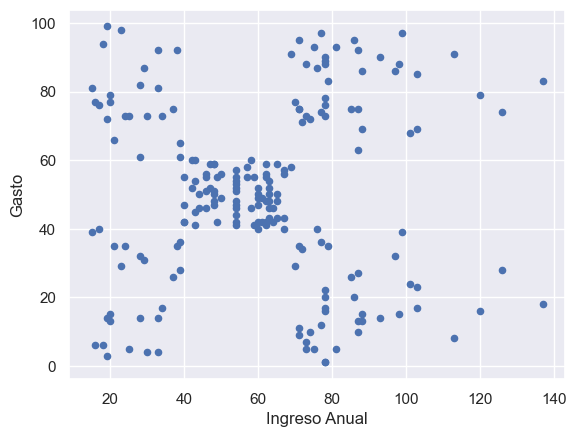

In [17]:
df.plot.scatter(x="Ingreso Anual", y="Gasto");

In [18]:
#Estandarizacion de datos

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
col_escalar = ['Edad', 'Ingreso Anual', 'Gasto']
datos_escalados = df.copy()
datos_escalados[col_escalar] = scaler.fit_transform(df[col_escalar])

In [22]:
#Uso de kmeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
modelo = KMeans(n_clusters=5, random_state=16)
modelo.fit(datos_escalados[col_escalar])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",16
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [25]:
datos_escalados['Segmento K'] = modelo.predict(datos_escalados[col_escalar])
datos_escalados

,CustomerID,Genero,Edad,Ingreso Anual,Gasto,Segmento,Segmento K
0,1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,2
1,2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,3
2,3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,2
3,4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,3
4,5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,2
...,...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,Ingreso alto,1
196,197,Female,0.441365,2.497807,-0.861839,Ingreso alto,4
197,198,Male,-0.491602,2.497807,0.923953,Ingreso alto,1
198,199,Male,-0.491602,2.917671,-1.250054,Ingreso alto,4


In [26]:
datos_escalados['Segmento K'].value_counts()

Segmento K
0    59
2    47
1    39
4    33
3    22
Name: count, dtype: int64

In [27]:
marcador = ['x', '*', ',', '|', ' ']


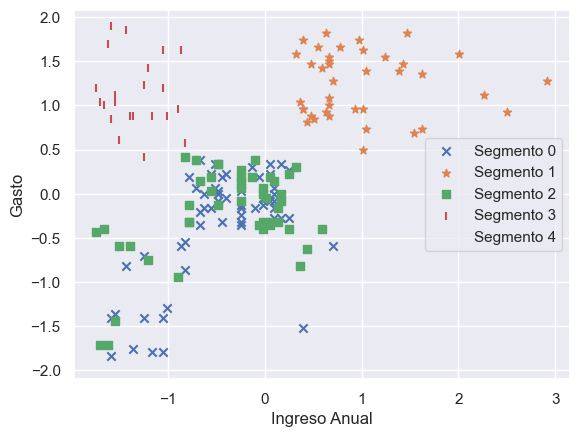

In [28]:
for segmento in range(5):
    temporal = datos_escalados[datos_escalados['Segmento K'] == segmento]
    plt.scatter(temporal['Ingreso Anual'], temporal['Gasto'], marker=marcador[segmento], label=f'Segmento {segmento}')  

plt.xlabel('Ingreso Anual')
plt.ylabel('Gasto')
plt.legend()

In [29]:
datos_escalados[col_escalar].head()

,Edad,Ingreso Anual,Gasto
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [30]:
from mpl_toolkits import mplot3d

In [31]:
%matplotlib widget

In [41]:
print(datos_escalados['Segmento K'].value_counts())
datos_escalados.head()

Segmento K
0    59
2    47
1    39
4    33
3    22
Name: count, dtype: int64


,CustomerID,Genero,Edad,Ingreso Anual,Gasto,Segmento,Segmento K
0,1,Male,-1.424569,-1.738999,-0.434801,1,2
1,2,Male,-1.281035,-1.738999,1.195704,1,3
2,3,Female,-1.352802,-1.700830,-1.715913,1,2
3,4,Female,-1.137502,-1.700830,1.040418,1,3
4,5,Female,-0.563369,-1.662660,-0.395980,1,2


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
codificador = LabelEncoder()
datos_escalados['Segmento K'] = codificador.fit_transform(datos_escalados['Segmento K'])
datos_escalados.head()

,CustomerID,Genero,Edad,Ingreso Anual,Gasto,Segmento,Segmento K
0,1,Male,-1.424569,-1.738999,-0.434801,1,2
1,2,Male,-1.281035,-1.738999,1.195704,1,3
2,3,Female,-1.352802,-1.700830,-1.715913,1,2
3,4,Female,-1.137502,-1.700830,1.040418,1,3
4,5,Female,-0.563369,-1.662660,-0.395980,1,2


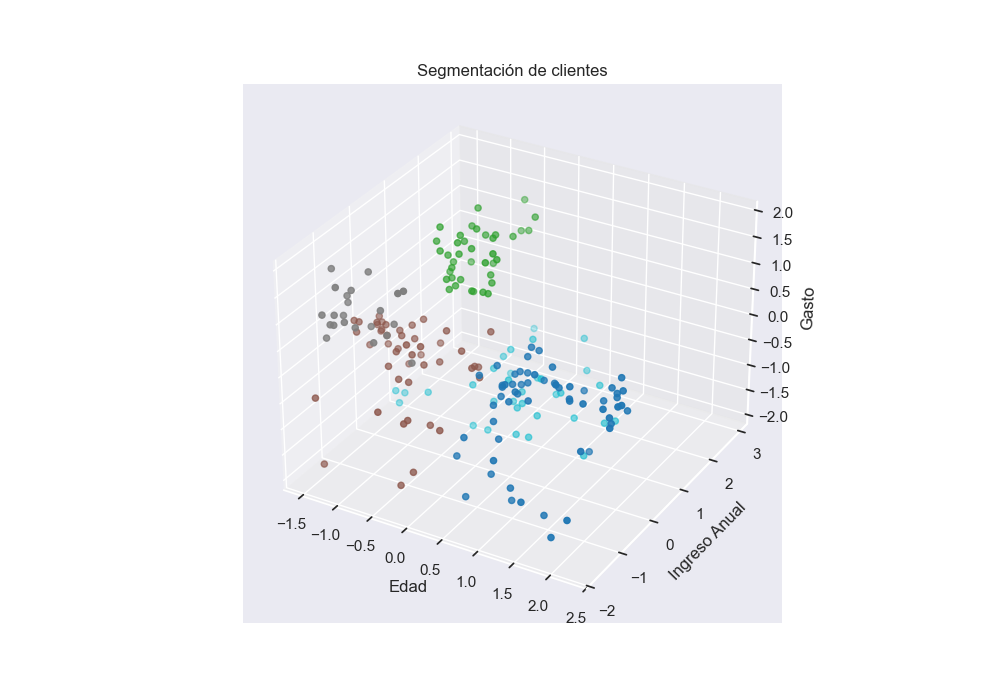

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_escalados['Edad'], datos_escalados['Ingreso Anual'], datos_escalados['Gasto'], c=datos_escalados['Segmento K'], cmap='tab10')
plt.title('Segmentación de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
ax.set_zlabel('Gasto')
plt.show()